In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

## [1-a-i] 평균 걸음 수 분포

#### 걸음 수 10,000보 목표를 달성하지 못한 사람은 전체 중 얼마나 있을까?

In [2]:
steps_df = pd.read_csv('./all_user_steps.csv')
steps_df.head(3)

,USERNAME,DATE,TIME,HOUR,MINUTE,STEPS
0,A01,2016-04-01,00:00:00,0,0,0
1,A01,2016-04-01,00:01:00,0,1,0
2,A01,2016-04-01,00:02:00,0,2,0


In [3]:
temp = steps_df.groupby(['USERNAME','DATE'])['STEPS'].sum().reset_index()

In [4]:
temp.head(3)

,USERNAME,DATE,STEPS
0,A01,2016-04-01,13468
1,A01,2016-04-02,9446
2,A01,2016-04-03,6084


In [5]:
steps = pd.DataFrame(temp.groupby(['USERNAME'])['STEPS'].mean())

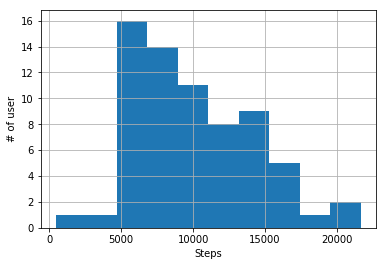

In [6]:
steps['STEPS'].hist()
plt.xlabel('Steps')
plt.ylabel('# of user')
plt.show()

하루 10,000보를 달성하지 못한 경우 : 57.35%


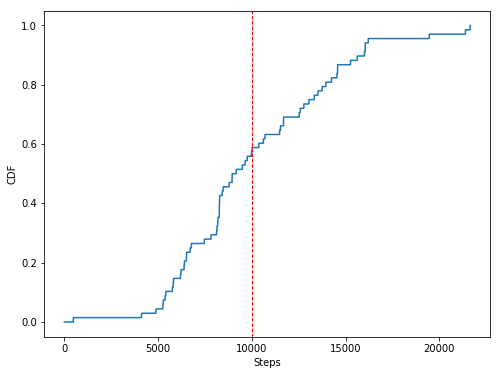

In [7]:
step_list = [int(step) for step in steps['STEPS']]
step_list_count = np.zeros(max(step_list)+1)
for step in step_list:
    step_list_count[int(step)] += 1
step_cumsum = step_list_count.cumsum()
step_cdf = [cumsum/step_cumsum[-1] for cumsum in step_cumsum]
print('하루 10,000보를 달성하지 못한 경우 : {0}%'.format(round(step_cdf[10000]*100,2)))
plt.figure(figsize=(8,6))
plt.plot(step_cdf)
plt.axvline(x=10000, color='r', linestyle='--', linewidth=1)
plt.xlabel('Steps')
plt.ylabel('CDF')
plt.show()

## [1-a-ii] 평균 수면량 분포

#### 성인 하루 권장 수면 시간 6시간을 지키지 못한 사람은 얼마나 있을까?

In [8]:
sleep_df = pd.read_csv('./all_user_sleeps.csv')
sleep_df.tail(3)

,USERNAME,DATE,STARTTIME,MINUTESASLEEP,MINUTESAWAKE,TIMEINBED
2631,A097,2016-05-20,01:12:00,265,127,548
2632,A098,2016-04-10,03:52:00,434,16,450
2633,A098,2016-05-18,18:02:00,244,2,249


In [9]:
sleep_temp = sleep_df.groupby(['USERNAME','DATE'])['MINUTESASLEEP'].sum().reset_index()

In [10]:
sleep = pd.DataFrame(sleep_temp.groupby(['USERNAME'])['MINUTESASLEEP'].mean())

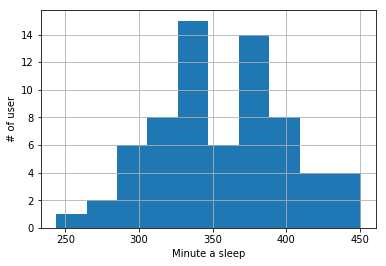

In [11]:
sleep['MINUTESASLEEP'].hist()
plt.xlabel('Minute a sleep')
plt.ylabel('# of user')
plt.show()

하루 수면 시간이 6시간이 안되는 경우 : 48.53%


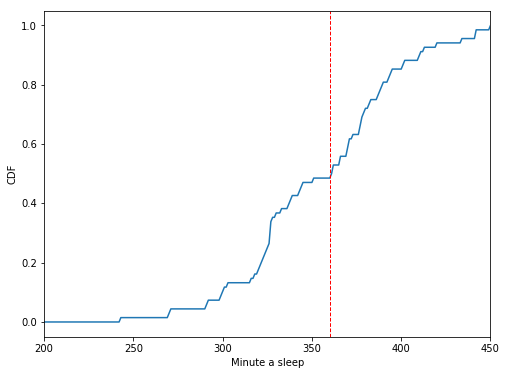

In [12]:
sleep_list = [int(sleep) for sleep in sleep['MINUTESASLEEP']]
sleep_list_count = np.zeros(max(sleep_list)+1)
for sleep in sleep_list:
    sleep_list_count[int(sleep)] += 1
sleep_cumsum = sleep_list_count.cumsum()
sleep_cdf = [cumsum/sleep_cumsum[-1] for cumsum in sleep_cumsum]
print('하루 수면 시간이 6시간이 안되는 경우 : {0}%'.format(round(sleep_cdf[360]*100,2)))
plt.figure(figsize=(8,6))
plt.plot(sleep_cdf)
plt.axvline(x=360, color='r', linestyle='--', linewidth=1)
plt.xlabel('Minute a sleep')
plt.xlim(200,450)
plt.ylabel('CDF')
plt.show()

## [1-a-iii] 평균 심박수 분포

#### 하루 평균 심박수가 100이하인 사람들

In [13]:
heart_df = pd.read_csv('./all_user_hearts.csv')
heart_df.head(3) 

,USERNAME,DATE,TIME,VALUE
0,A01,2016-04-01,00:00:00,79
1,A01,2016-04-01,00:01:00,80
2,A01,2016-04-01,00:02:00,78


In [14]:
heart = heart_df.groupby(['USERNAME'])['VALUE'].mean().reset_index()

In [15]:
heart.head(5)

,USERNAME,VALUE
0,A01,81.620110
1,A010,75.746871
2,A016,83.961060
3,A017,77.922819
4,A018,74.145573


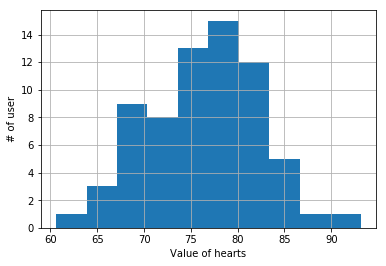

In [16]:
heart['VALUE'].hist()
plt.xlabel('Value of hearts')
plt.ylabel('# of user')
plt.show()

하루 평균 심박수가 100이하인 사람들 : 1.47%


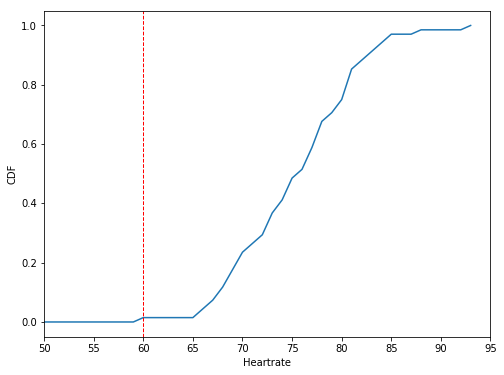

In [17]:
heart_list = [int(heart) for heart in heart['VALUE']]

heart_list_count = np.zeros(max(heart_list)+1)
for heart in heart_list:
    heart_list_count[int(heart)] += 1
heart_cumsum = heart_list_count.cumsum()
heart_cdf = [cumsum/heart_cumsum[-1] for cumsum in heart_cumsum]
print('하루 평균 심박수가 100이하인 사람들 : {0}%'.format(round(heart_cdf[60]*100,2)))
plt.figure(figsize=(8,6))
plt.plot(heart_cdf)
plt.axvline(x=60, color='r', linestyle='--', linewidth=1)
plt.xlabel('Heartrate')
plt.xlim(50,95)
plt.ylabel('CDF')
plt.show()

## [1-b] 걸음, 수면 상관관계 요인

In [18]:
weather_temp = pd.read_csv('sokulee_weather.csv')
weather_temp['DATETIME'] = pd.to_datetime(weather_temp['DATETIME'], format='%Y-%m-%d')
weather_temp['DATE'] = weather_temp['DATETIME'].apply(lambda x: str(x.date()))
weather_temp = weather_temp.drop(['STATION'], axis=1)
weather_temp = weather_temp.fillna(value = 0.0)
weather_temp.head(5)

,DATETIME,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY,DATE
0,2016-04-01 00:00:00,10.8,0.0,0.0,38,2016-04-01
1,2016-04-01 01:00:00,9.5,0.0,0.1,49,2016-04-01
2,2016-04-01 02:00:00,8.6,0.0,0.3,49,2016-04-01
3,2016-04-01 03:00:00,7.8,0.0,1.1,52,2016-04-01
4,2016-04-01 04:00:00,6.5,0.0,0.1,60,2016-04-01


In [19]:
# step 데이터 날짜별로 평균
stepg = steps_df.groupby(['USERNAME','DATE'])['STEPS'].sum().reset_index()
stepg = stepg.groupby(['DATE'])['STEPS'].mean().reset_index()

# sleep 데이터 날짜별로 평균
sleepg = sleep_df.groupby(['DATE'])['MINUTESASLEEP'].mean().reset_index()

# step 과 sleep 합치기
join = pd.merge(stepg, sleepg, how='inner')

In [20]:
# 최고 온도 합치기
tempg = weather_temp.groupby(['DATE'])['TEMPERATURE'].max().reset_index()
join = pd.merge(join, tempg, how='inner')

# 총 강수량 합치기
raing = weather_temp.groupby(['DATE'])['RAINFALL'].sum().reset_index()
join = pd.merge(join, raing, how='inner')

# 평균 풍속 합치기
windg = weather_temp.groupby(['DATE'])['WINDSPEED'].mean().reset_index()
join = pd.merge(join, windg, how='inner')

# 평균 습도 합치기
humg = weather_temp.groupby(['DATE'])['HUMIDITY'].mean().reset_index()
join = pd.merge(join, humg, how='inner')

In [21]:
join['DATE'] = pd.to_datetime(join['DATE'], format='%Y-%m-%d')
join['WEEKDAY'] = join['DATE'].apply(lambda x: x.weekday())

In [22]:
join.head(5)

,DATE,STEPS,MINUTESASLEEP,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY,WEEKDAY
0,2016-04-01,11632.500000,343.771930,24.9,0.0,0.979167,37.208333,4
1,2016-04-02,10662.938462,336.525424,24.1,0.0,1.145833,40.958333,5
2,2016-04-03,7870.104478,422.937500,16.3,2.5,1.379167,64.916667,6
3,2016-04-04,16206.477612,359.189655,18.0,0.0,1.887500,72.375000,0
4,2016-04-05,13893.089552,335.931034,20.5,0.0,1.712500,40.125000,1


C:\Users\USER\Anaconda3\envs\tf_cpu\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


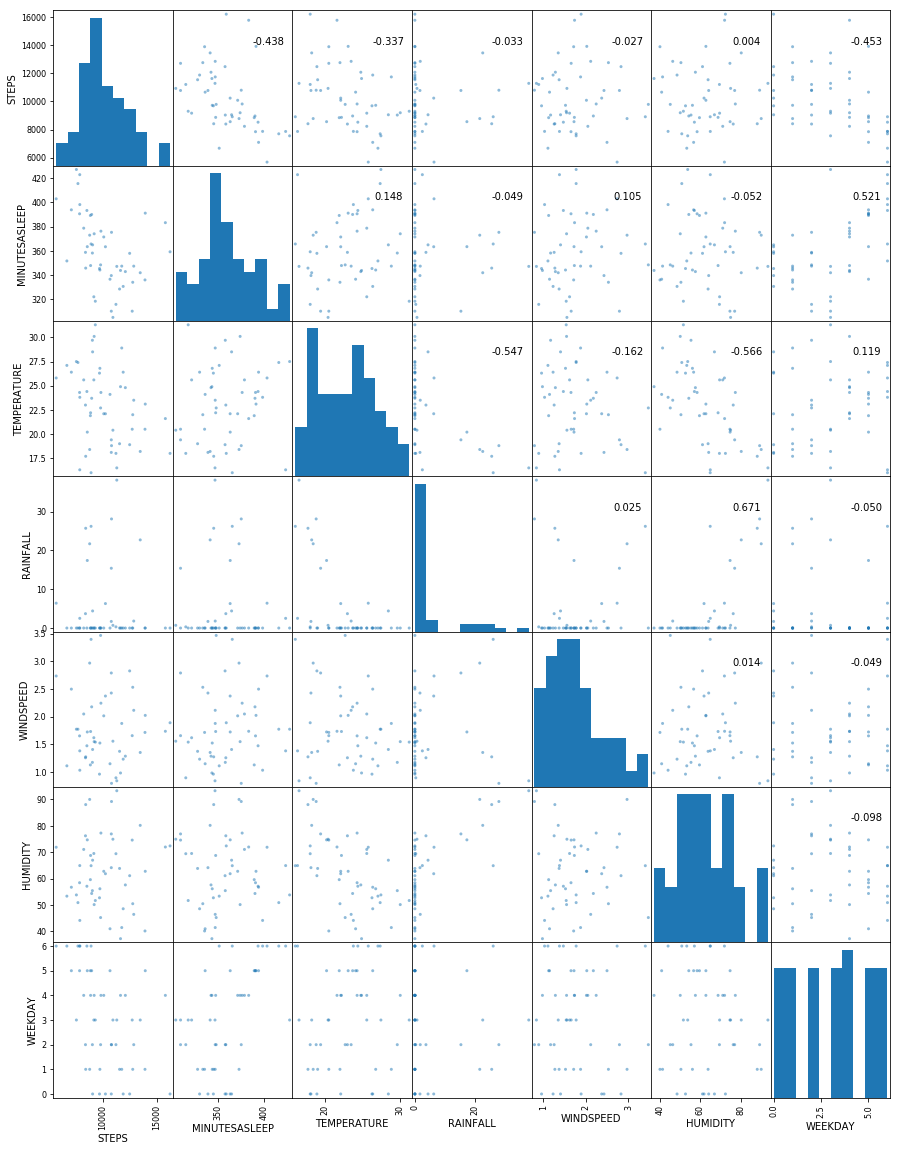

In [23]:
axes = pd.plotting.scatter_matrix(join,figsize=(15,20), alpha=0.5)

corr = join.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

## [1-b-i] 요일

#### 요일별 걸음수

In [24]:
bar_steps = steps_df.groupby(['USERNAME','DATE'])['STEPS'].sum().reset_index()

In [25]:
bar_steps['DATE'] = pd.to_datetime(bar_steps['DATE'], format='%Y-%m-%d')
bar_steps['WEEKDAY'] = bar_steps['DATE'].apply(lambda x: x.weekday())

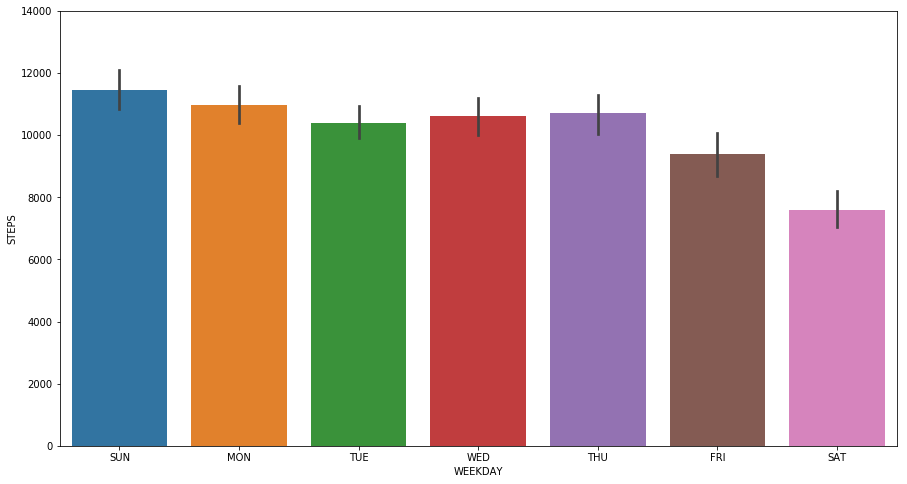

In [26]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='WEEKDAY', y='STEPS', data=bar_steps)
plt.xticks(range(0,7), ['SUN','MON','TUE','WED','THU','FRI','SAT'])
plt.ylim(0,14000)
plt.show()

### 요일별 수면시간

In [27]:
bar_sleeps = sleep_df.groupby(['USERNAME','DATE'])['MINUTESASLEEP'].sum().reset_index()

In [28]:
bar_sleeps['DATE'] = pd.to_datetime(bar_sleeps['DATE'], format='%Y-%m-%d')
bar_sleeps['WEEKDAY'] = bar_sleeps['DATE'].apply(lambda x: x.weekday())

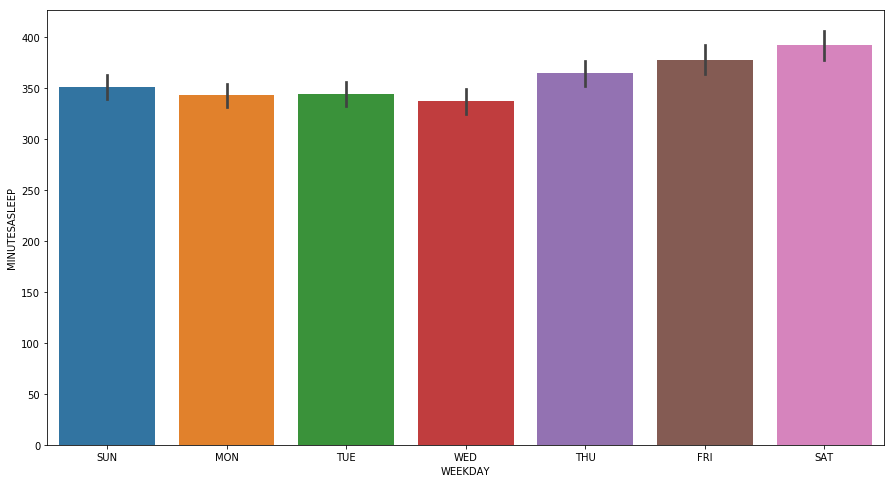

In [29]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='WEEKDAY', y='MINUTESASLEEP', data=bar_sleeps)
plt.xticks(range(0,7), ['SUN','MON','TUE','WED','THU','FRI','SAT'])
plt.show()

## [1-b-ii] 최고 기온

In [30]:
tem_steps = steps_df.groupby(['USERNAME','DATE'])['STEPS'].sum().reset_index()
tem_steps['DATE'] = pd.to_datetime(tem_steps['DATE'], format='%Y-%m-%d')

In [31]:
weather = pd.read_csv('sokulee_weather.csv')
weather.head(5)

,STATION,DATETIME,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY
0,133,2016-04-01 00:00,10.8,NaN,0.0,38
1,133,2016-04-01 01:00,9.5,NaN,0.1,49
2,133,2016-04-01 02:00,8.6,NaN,0.3,49
3,133,2016-04-01 03:00,7.8,NaN,1.1,52
4,133,2016-04-01 04:00,6.5,NaN,0.1,60


In [32]:
weather['DATETIME'] = pd.to_datetime(weather['DATETIME'], format='%Y-%m-%d')
weather['DATE'] = weather['DATETIME'].apply(lambda x: x.date())

In [33]:
weather = weather.drop(['STATION'], axis=1)
weather = weather.fillna(value = 0.0)

C:\Users\USER\Anaconda3\envs\tf_cpu\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


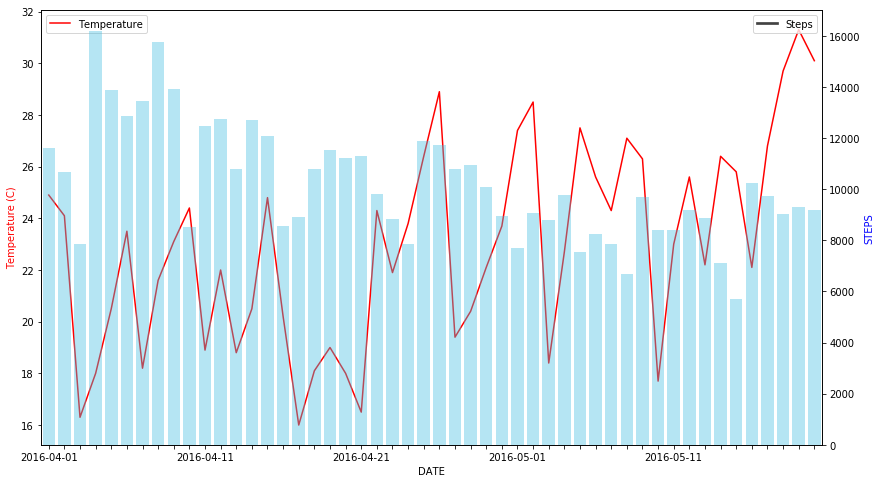

In [35]:
test = tem_steps.groupby(['DATE'])['STEPS'].mean().reset_index()
test['DATE'] = test['DATE'].apply(lambda x : x.date())

weather_group = weather.groupby(['DATE'])['TEMPERATURE'].max().reset_index()
weather_group['DATE'] = weather_group['DATE'].apply(lambda x : str(x))

ax2, ax1 = plt.subplots()

ax2 = sns.lineplot(x=weather_group['DATE'], y=weather_group['TEMPERATURE'],ci=False,color='r')
ax2.set(xlabel='DATE', ylabel='Temperature (C)')
ax2.legend(['Temperature'], loc='upper left')

ax1 = ax2.twinx()
ax1 = sns.barplot(x=test['DATE'], y=test['STEPS'],ci=False, alpha=0.4, color='#2ECCFA')
ax1.set(xlabel='DATE', ylabel='STEPS')
ax1.legend(['Steps'], loc='upper right')

ax1.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('red')
plt.rcParams["figure.figsize"] = (14,8)

a = test['DATE']
for i in range(len(a)):
    if i % 10 != 0:
        a[i] = ''
ax2.set_xticklabels(a)
plt.show()

## [1-b-iii] 강수량

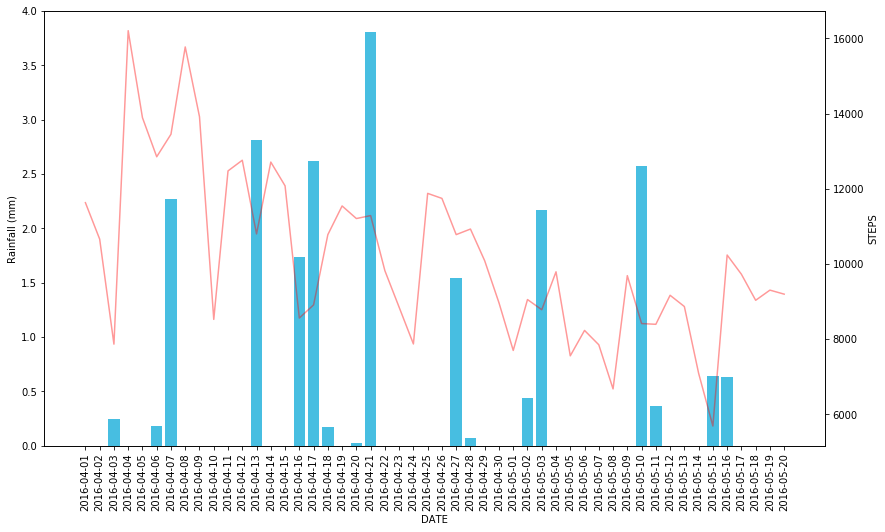

In [36]:
test = tem_steps.groupby(['DATE'])['STEPS'].mean().reset_index()
test['DATE'] = test['DATE'].apply(lambda x : str(x.date()))

weather_group = weather.groupby(['DATE'])['RAINFALL'].sum().reset_index()

ax2, ax1 = plt.subplots()


ax2 = sns.barplot(x=weather_group['DATE'], y=weather_group['RAINFALL']*0.1,ci=False, color='#2ECCFA')
ax2.set(xlabel='DATE', ylabel='Rainfall (mm)')

ax1 = ax2.twinx()
ax1 = sns.lineplot(x=test['DATE'], y=test['STEPS'], alpha=0.4, color='r')
ax1.set(xlabel='DATE', ylabel='STEPS')

plt.rcParams["figure.figsize"] = (20,8)
ax2.set_xticklabels(test['DATE'],rotation=90)
plt.show()

## [1-c] Fibit 하루 이용자 변화 분석

In [37]:
all_heart = pd.read_csv('all_user_hearts.csv')

In [38]:
all_heart = all_heart.groupby(['DATE','USERNAME'])['VALUE'].count().reset_index()

In [39]:
all_heart = all_heart.groupby(['DATE']).count().reset_index()

In [40]:
all_heart.head(5)

,DATE,USERNAME,VALUE
0,2016-04-01,51,51
1,2016-04-02,51,51
2,2016-04-03,65,65
3,2016-04-04,65,65
4,2016-04-05,66,66


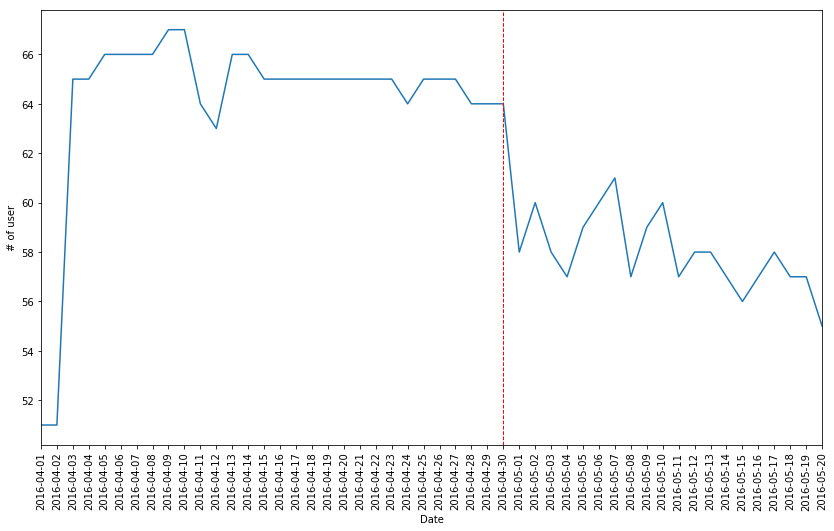

In [41]:
plt.figure(figsize=(14,8))

plt.plot(all_heart['DATE'],all_heart['VALUE'])

## 급격히 줄어드는 지점 계산
dis = []
for i in range(len(all_heart)-1):
    dis.append(all_heart['VALUE'][i]-all_heart['VALUE'][i+1])
plt.axvline(x=all_heart['DATE'][dis.index(max(dis))], color='r', linestyle='--', linewidth=1)

plt.xlabel('Date')
plt.xlim('2016-04-01','2016-05-20')
plt.xticks(rotation=90)
plt.ylabel('# of user')
plt.show()